In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# import numpy as np
# import pandas as pd
# import cv2
# import seaborn as sns
# import os
# from PIL import Image

# import matplotlib.pyplot as plt
# import glob

# from keras.models import Sequential
# from keras.layers import Conv2D, Dense, Flatten, BatchNormalization, MaxPooling2D

# from keras.applications import VGG16

# from sklearn import preprocessing
# from sklearn.ensemble import RandomForestClassifier
# from keras.utils import  to_categorical
# from sklearn import metrics
# from sklearn.metrics import confusion_matrix
# train_image = []
# train_label = []
# test_image = []
# test_label = []
# train_pos = '/content/drive/MyDrive/MINI/positive_1'
# train_neg = '/content/drive/MyDrive/MINI/negative_1'
# test_pos = '/content/drive/MyDrive/MINI/positive_test'
# test_neg = '/content/drive/MyDrive/MINI/negative_test'
# for filename in os.listdir(train_pos):
#     img_path = train_pos+'/'+filename
#     img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     train_image.append(img)
#     train_label.append(1)

# for filename in os.listdir(train_neg):
#     img_path = train_neg+'/'+filename
#     img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     train_image.append(img)
#     train_label.append(0)

# for filename in os.listdir(test_pos):
#     img_path = test_pos+'/'+filename
#     img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     test_image.append(img)
#     test_label.append(1)

# for filename in os.listdir(test_neg):
#     img_path = test_neg+'/'+filename
#     img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
#     test_image.append(img)
#     test_label.append(0)



# train_image = np.array(train_image)
# test_image = np.array(test_image)
# print(train_image)
# print(len(test_image))
# print(len(train_label))
# print(len(test_label))
# train_image = train_image/255.0
# test_image = test_image/255.0
# VGG_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (128, 128, 3))

# for layer in VGG_model.layers:
#     layer.trainable = False

# VGG_model.summary()
# feature_extractor = VGG_model.predict(train_image)
# features = feature_extractor.reshape(feature_extractor.shape[0], -1)

# X_rf = features
# RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# RF_model.fit(X_rf, train_label)

# X_test_feature = VGG_model.predict(test_image)
# X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# prediction_RF = RF_model.predict(X_test_features)
# cm = confusion_matrix(test_label, prediction_RF)
# sns.heatmap(cm, annot = True)

# tp, fp, fn, tn = cm.ravel()

# recall = tp/(tp+fn)
# precision = tp/(tp+fp)

# print('Accuracy =', metrics.accuracy_score(test_label, prediction_RF))
# print("Recall =", recall)
# print("Precision =", precision)
# plt.figure(figsize=(12, 4))

# # Plot accuracy
# plt.subplot(1, 2, 1)
# plt.plot(RF_model.RF_model['accuracy'], label='Training Accuracy')
# plt.plot(RF_model.RF_model['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# # Plot loss
# plt.subplot(1, 2, 2)
# plt.plot(RF_model.history['loss'], label='Training Loss')
# plt.plot(RF_model.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.tight_layout()
# plt.show()

from PIL import Image
import cv2
import numpy as np
import os

mask = '/content/drive/MyDrive/project/GT'
image = '/content/drive/MyDrive/project/NORMAL'
# Load the grayscale image
m = []
p = []
for filename in os.listdir(mask):
    img_path = os.listdir(mask+'/'+filename+'/SoftMap')
    first = Image.open(mask+'/'+filename+'/SoftMap/'+img_path[0])
    second = Image.open(mask+'/'+filename+'/SoftMap/'+img_path[1])
    new_size = (2000, 1710)
    resized_image_1 = first.resize(new_size)
    resized_image_2 = second.resize(new_size)
    array1 = np.array(resized_image_1)
    array2 = np.array(resized_image_2)
    color_image_1 = cv2.merge([np.zeros_like(array1), array1, np.zeros_like(array1)])
    color_image_2 = cv2.merge([array2, np.zeros_like(array2), np.zeros_like(array2)])
    array1=color_image_1
    array2=color_image_2
    result_array = np.bitwise_xor(array1, array2)
    result_image = Image.fromarray(result_array)
    m.append(result_image)

for filename in os.listdir(image):
    img_path = image+'/'+filename
    first = Image.open(img_path)
    new_size = (2000, 1710)
    resized_image_1 = first.resize(new_size)
    p.append(resized_image_1)




destination_directory_pos = '/content/drive/MyDrive/project/u_net/image'
destination_directory_neg = '/content/drive/MyDrive/project/u_net/mask'

for i in range(len(p)):
    destination_path_pos = os.path.join(destination_directory_pos, "image_"+str(i)+".png")
    p[i].save(destination_path_pos)

for i in range(len(m)):
    destination_path_neg = os.path.join(destination_directory_neg, "image_"+str(i)+".png")
    m[i].save(destination_path_neg)


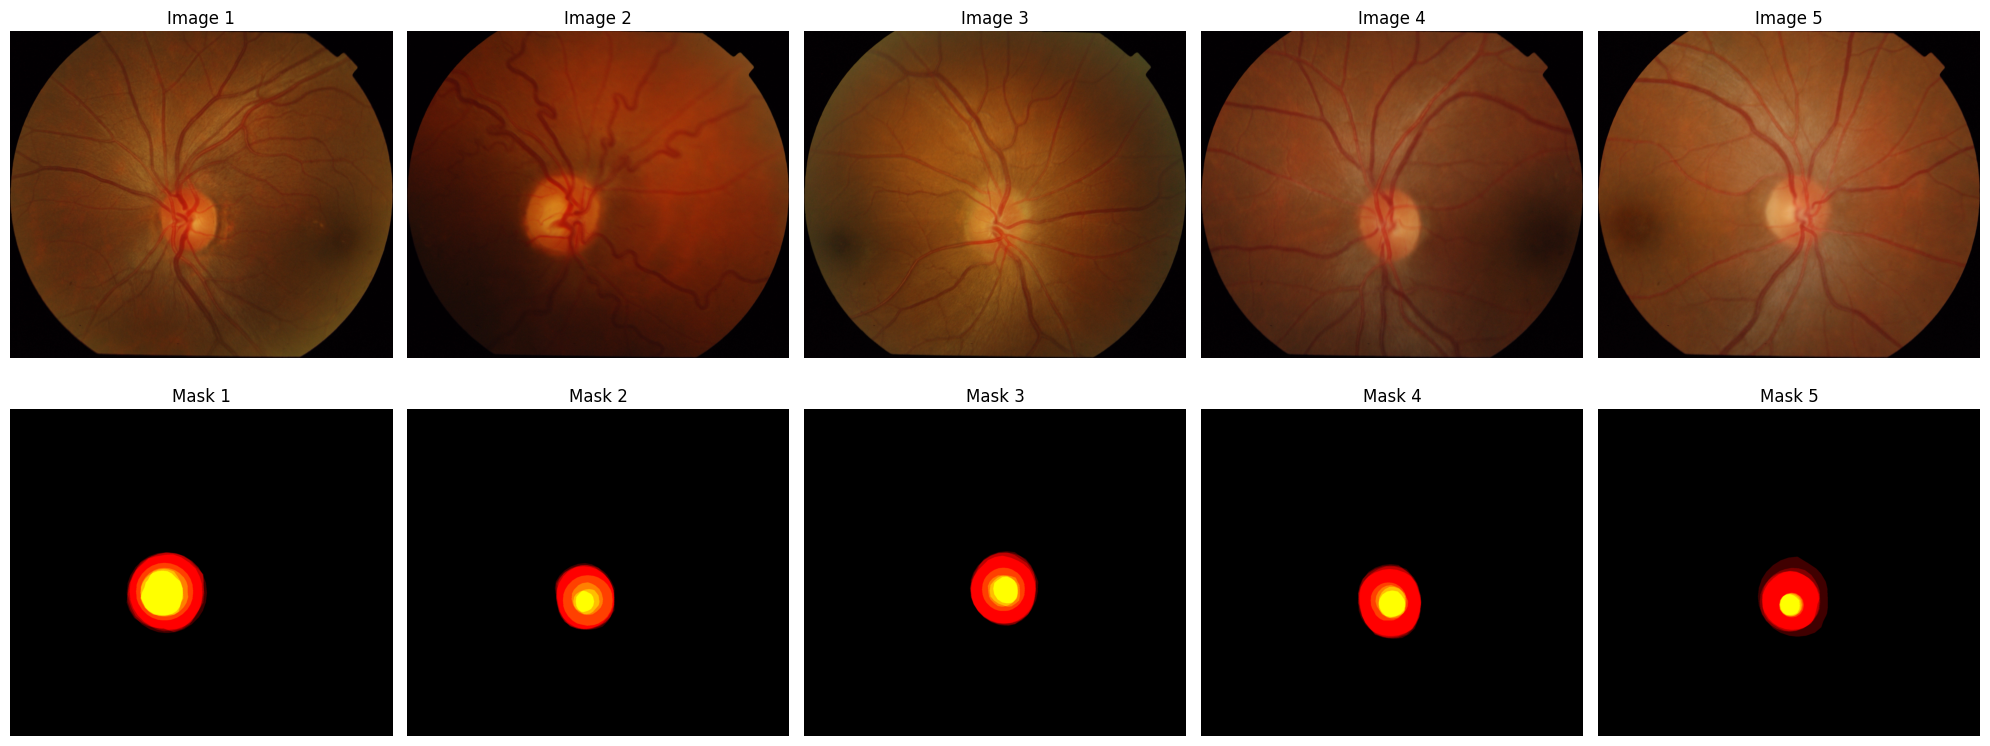

In [25]:
import matplotlib.pyplot as plt

# Plotting function
def plot_images_side_by_side(images, masks, image_titles, mask_titles):
    num_images = len(images)
    fig, axes = plt.subplots(2, num_images, figsize=(20, 8))
    for i in range(num_images):
        axes[0, i].imshow(images[i])
        axes[0, i].set_title(image_titles[i])
        axes[0, i].axis('off')
        axes[1, i].imshow(masks[i])
        axes[1, i].set_title(mask_titles[i])
        axes[1, i].axis('off')
    plt.tight_layout()
    plt.show()

# Ensure both lists have the same number of elements
min_length = min(len(p), len(m))
p = p[:min_length]
m = m[:min_length]

# Titles for the images
image_titles = ['Image ' + str(i+1) for i in range(len(p))]
mask_titles = ['Mask ' + str(i+1) for i in range(len(m))]

# Plot images and masks side by side
plot_images_side_by_side(p, m, image_titles, mask_titles)
